In [209]:
import geopandas as gpd
import json as json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

In [210]:
df_parishes = pd.read_csv('../data/parishes.csv')
df_points = pd.read_csv('../data/points.csv') 
# Read the shapefile into a
with open('../data/parish_shapefile.json', 'r') as f:
    shapes = json.load(f)

In [211]:
parishes = [x for x in df_parishes['parish']]
municipalities =  df_parishes['municipality'].unique()

In [212]:
shapes_porto = shapes
# in_porto = [shapes['features'][x]['properties']['name_3'] in df_parishes['parish'].values for x in range(0,len(shapes['features']))]
parish_index = dict(zip([shapes['features'][x]['properties']['name_3'] for x in range(0,len(shapes['features']))],range(0,len(shapes['features']))))

In [213]:
# Filter population df
df_parish_population

,code1,year,code2,name,gender,age_code,age,value
0,S7A2011,2011,0101,Águeda,H,01,0 - 9 anos,2093.0
1,S7A2011,2011,0101,Águeda,H,02,10 - 19 anos,2508.0
2,S7A2011,2011,0101,Águeda,H,03,20 - 29 anos,2844.0
3,S7A2011,2011,0101,Águeda,H,04,30 - 39 anos,3239.0
4,S7A2011,2011,0101,Águeda,H,05,40 - 49 anos,3431.0
...,...,...,...,...,...,...,...,...
247387,S7A2021,2021,PT,Portugal,HM,08,70 - 79 anos,1056568.0
247388,S7A2021,2021,PT,Portugal,HM,09,80 - 89 anos,590681.0
247389,S7A2021,2021,PT,Portugal,HM,10,90 - 99 anos,119495.0
247390,S7A2021,2021,PT,Portugal,HM,11,100 ou mais anos,2801.0


In [214]:
parishes_map = [
    'Paranhos',
    'Ramalde',
    'Cedofeita',
    'Miragaia',
    'Santo Ildefonso',
    'São Nicolau',
    'Sé',
    'Vitória',
    'Campanhã',
    'Aldoar',
    'Foz Do Douro',
    'Nevogilde',
    'Lordelo Do Ouro',
    'Massarelos',
    'Bonfim',
    'São Mamede De Infesta',
    'Senhora Da Hora',
    'Leça Da Palmeira',
    'Matosinhos',
    'Custóias',
    'Guifões',
    'Leça Do Balio',
    'Rio Tinto',
    'Mafamude',
    'Vilar Do Paraíso',
    'São Pedro Da Afurada',
    'Vila Nova De Gaia (Santa Marinha)',
    'Canidelo',
    'Oliveira Do Douro',
    'Madalena',
    'Pedrouços',
    'Ermesinde',
    'Gueifães',
    'Maia',
    'Vermoim',
    'Águas Santas',
    'Baguim Do Monte (Rio Tinto)',
    'Vilar de Andorinho',
    ##
    'Arcozelo',
    'Vilar De Andorinho',
    'Gulpilhares',
    'Valadares',
    'Gondomar (São Cosme)',
    'Jovim',
    'Valbom'
#     'Gulpilhares',
#     'Valadares'
]

In [215]:
# Filter shapes to Porto
features_porto = []
for feature in shapes['features']:
    if feature['properties']['name_2'] in municipalities and feature['properties']['name_3'] in parishes_map:
        features_porto.append(feature)
shapes_porto = shapes
shapes_porto['features'] = features_porto

In [216]:
shapes_porto_gpd = gpd.GeoDataFrame.from_features(features_porto)

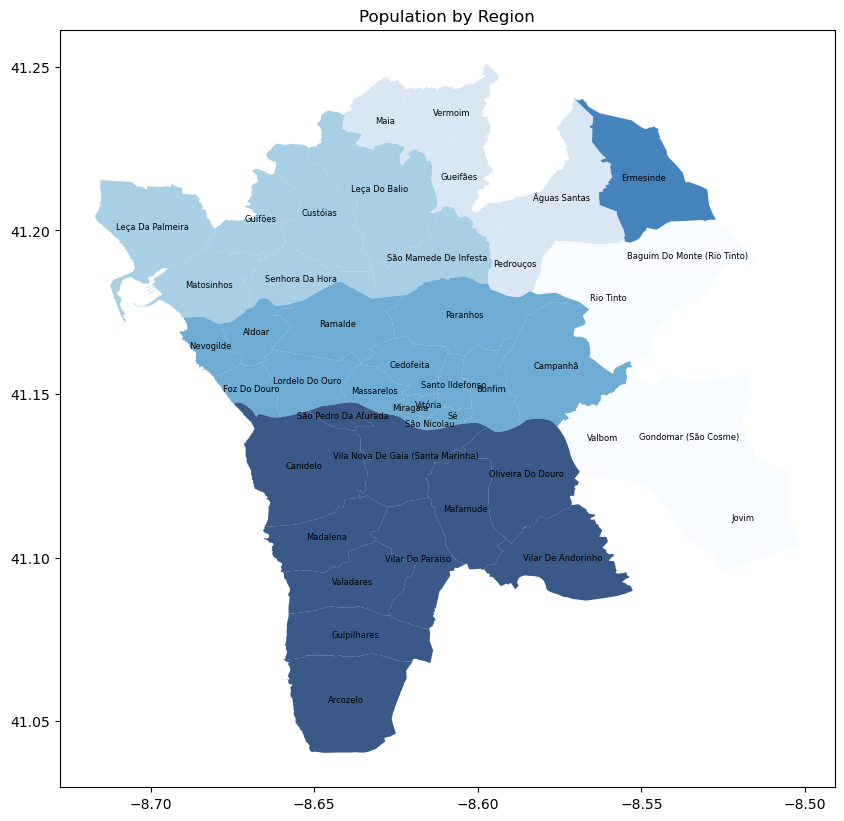

In [217]:
fig, ax = plt.subplots(figsize=(10, 10))
shapes_porto_gpd.plot(ax=ax, column='name_2', cmap='Blues', alpha=0.8)
for idx, row in shapes_porto_gpd.iterrows():
    label = row['name_3']
    ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6)
ax.set_title('Population by Region')
plt.show()


In [218]:
# df_filter = df_parish_population[[len(x)==4 for x in df_parish_population['code2']]]
# df_filter = df_filter[[x in ['Gondomar','Maia','Matosinhos','Porto','Valongo','Vila Nova de Gaia'] for x in df_filter['name']]]
# df_filter = df_filter[(df_filter['age'] == 'Total') & (df_filter['gender'] == 'HM') & (df_filter['year'] == 2021)]
# municipality_codes = df_filter['code2'].unique()

In [219]:
# df_porto = df_parish_population[[x[0:4] in municipality_codes and len(x)>4 for x in df_parish_population['code2']]]
# df_porto = df_porto[(df_porto['age'] == 'Total') & (df_porto['gender'] == 'HM') & (df_porto['year'] == 2021)]
# df_porto.sort_values(by=['code2']).to_csv('aux.csv')

In [220]:
shapes_porto_gpd[shapes_porto_gpd['name_3'] == 'Paranhos']

,geometry,id_0,iso,name_0,id_1,name_1,id_2,name_2,id_3,name_3,ccn_3,cca_3,type_3,engtype_3,nl_name_3,varname_3
29,"MULTIPOLYGON (((-8.60922 41.16246, -8.60892 41...",182,PRT,Portugal,15,Porto,219,Porto,2959,Paranhos,0,None,Parish,Parish,None,None


In [221]:
df_points['lat'].values

array([41.14602144, 41.14484406, 41.15781569, 41.15879874, 41.14566193,
       41.15751037, 41.14872896, 41.16118584, 41.16602656, 41.17581286,
       41.17681086, 41.16704354, 41.18874089, 41.19446895, 41.18531111,
       41.18540055, 41.18414638, 41.16881425, 41.1729231 , 41.18896793,
       41.09373639, 41.10102964, 41.11464934, 41.11918183, 41.15015752,
       41.15393054, 41.15342878, 41.15412405, 41.20795945, 41.20870981,
       41.22732942, 41.22293333, 41.13520053, 41.12899469, 41.12536051,
       41.14119333, 41.15222252, 41.15647924, 41.16769968, 41.17018233,
       41.1930137 , 41.18510639, 41.18551191, 41.19550753, 41.0488996 ,
       41.06306687, 41.06330781, 41.04911482, 41.18088117, 41.19727725,
       41.18954779, 41.20670116, 41.21667753, 41.23616034, 41.20555969,
       41.20544332, 41.15080821, 41.16631706, 41.16787069, 41.15235953,
       41.20411383, 41.22414173, 41.20537648, 41.20353227, 41.13421996,
       41.12081391, 41.12008981, 41.13630074, 41.13299905, 41.13

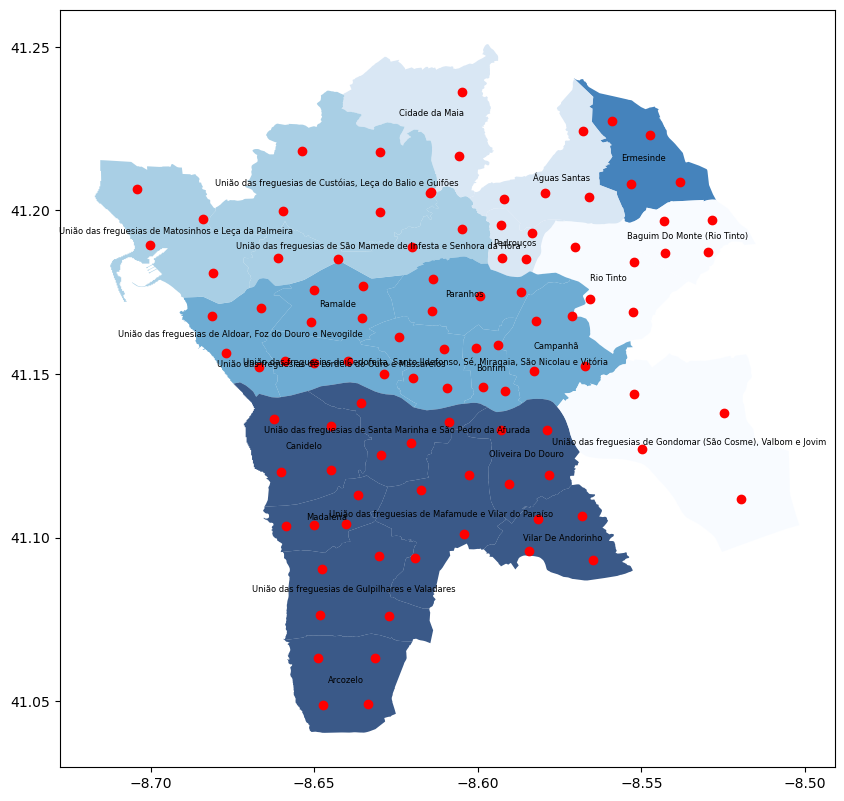

In [222]:
# Read the shapefile into a
with open('../data/parish_shapefile_merged.json', 'r') as f:
    shapes_merged = json.load(f)
shapes_merged_gpd = gpd.GeoDataFrame.from_features(shapes_merged['features'])
    
fig, ax = plt.subplots(figsize=(10, 10))

# Set the background color of the plot to black
# ax.set_facecolor('black')

shapes_merged_gpd.plot(ax=ax, column='name_2', cmap='Blues', alpha=0.8)

for idx, row in shapes_merged_gpd.iterrows():
    label = row['name_3']
    ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6, color='black')

# ax.set_title('Population by Region', color='white')
# ax.title.set_color('white')


# # Plot the points
# ax.scatter(x_points, y_points, color='red', s=10)
# for idx, row in shapes_merged_gpd.iterrows():
#     label = row['name_3']
#     ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6, color='white')

ax.scatter(df_points['long'], df_points['lat'], c='red')

plt.savefig('points.png', dpi=1200)
plt.show()


In [223]:
municipalities

array(['Porto', 'Matosinhos', 'Gondomar', 'Vila Nova de Gaia', 'Valongo',
       'Maia'], dtype=object)